In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# REGRESION LINEAL

array([[-0.3169548]])

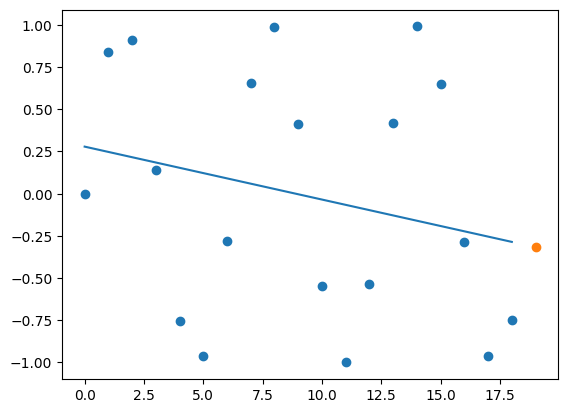

In [22]:
from sklearn.linear_model import LinearRegression

x= np.arange(0,19, )
y=  np.sin(x) 
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1, 1) ,y.reshape(-1, 1) )
predicho = lin_reg.predict(np.array([19]).reshape(-1, 1) )
plt.scatter(x,y)
plt.scatter(19, predicho )
plt.plot(x, lin_reg.predict(x.reshape(-1, 1)))
predicho

In [10]:
np.sin(19)

np.float64(0.14987720966295234)

In [30]:
datos = {
    "Edad": np.array([25,30,35,40,45]),
    "Salario": np.array([3000,3500,4000,4500,5000])

}

dataframe = pd.DataFrame(datos)

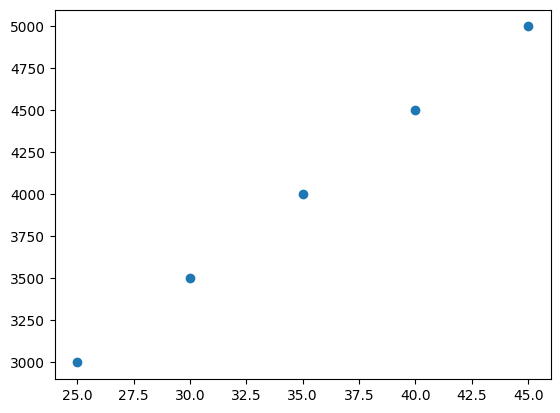

In [25]:
plt.scatter(datos["Edad"], datos["Salario"], marker='o')

In [31]:
datos["Edad"], datos["Salario"]

(array([25, 30, 35, 40, 45]), array([3000, 3500, 4000, 4500, 5000]))

In [66]:
[60, predicho[0][0]]

[60, np.float64(6500.0)]

In [ ]:
regrersion_lin = LinearRegression()

X_train, x_test, y_train, y_test = train_test_split(datos["Edad"], datos["Salario"], test_size=0.2) 
regrersion_lin.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

predicho = regrersion_lin.predict(np.array([60]).reshape(-1,1))


datos_nuevo =  {
"Edad":60,
"Salario": predicho[0][0]
}
dataframe = pd.concat([dataframe, pd.DataFrame([datos_nuevo])], ignore_index=True)

plt.scatter(dataframe["Edad"], dataframe["Salario"])
plt.plot(dataframe["Edad"], dataframe["Salario"])

AttributeError: 'Series' object has no attribute 'reshape'

# REGRESION LOGISTICA

In [80]:
from sklearn.linear_model import LogisticRegression


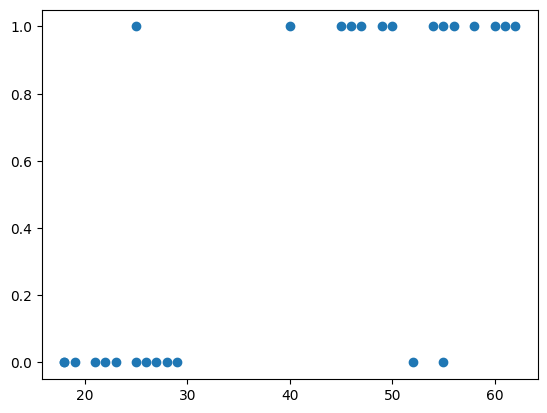

In [84]:
df = pd.read_csv("datos_seguro.csv")
plt.scatter(df["edad"], df["compra"])

In [103]:
X_train, X_test, y_train,y_test = train_test_split(df[["edad"]], df["compra"], train_size=0.9)

In [104]:
regrersion = LogisticRegression()
regrersion.fit(X_train, y_train)


LogisticRegression()

In [110]:
predict  = regrersion.predict(X_test)


In [118]:
regrersion.score(X_train, y_train) *100

87.5

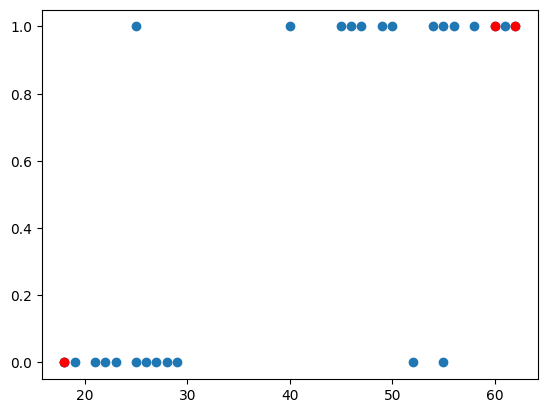

In [113]:
plt.scatter(df["edad"], df["compra"])
plt.scatter(X_test, predict, color='r')

In [143]:

probabilidades = regrersion.predict_proba(np.arange(25,55,5).reshape(-1,1)) # provabilidades

c:\Users\molten gama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [149]:
np.arange(25,55,5) ,  probabilidades[:,1]

(array([25, 30, 35, 40, 45, 50]),
 array([0.14273115, 0.24063483, 0.37622188, 0.53443811, 0.68601569,
        0.80614357]))

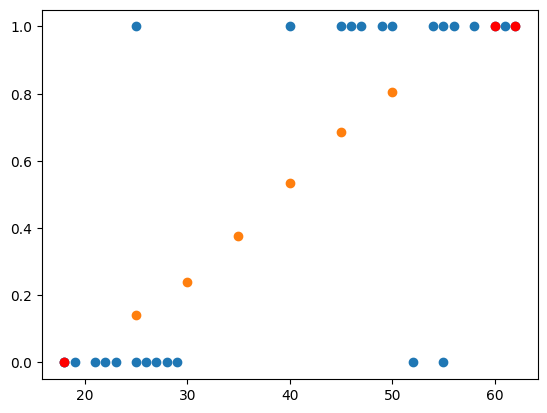

In [150]:
plt.scatter(df["edad"], df["compra"])
plt.scatter(X_test, predict, color='r')
plt.scatter(np.arange(25,55,5), probabilidades[:,1])

In [152]:
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}
 
df = pd.DataFrame(datos)
df

,edad,salario,compra
0,25,50000,0
1,30,54000,0
2,45,72000,1
3,22,42000,0
4,34,62000,1
5,40,68000,1
6,27,49000,0
7,31,56000,0
8,43,76000,1
9,50,90000,1


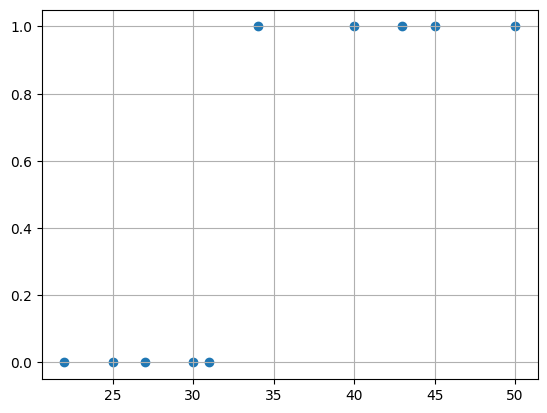

In [153]:
plt.scatter(df["edad"], df["compra"])
plt.grid()

In [ ]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(df[["edad"]], df["compra"],test_size=0.9)
modelo_desicion = LogisticRegression()
modelo_desicion.fit(X_entrenamiento, y_entrenamiento)
modelo_desicion.score(X_prueba, y_prueba)

# ARBOL DE DESICION

- categorias

sn

In [50]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.cm as cm

In [51]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [52]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
X = df.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
tokenisador = LabelEncoder()

especies = tokenisador.fit_transform(df["species"])


In [58]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(df.iloc[:,:-2], especies, test_size=0.8, random_state=42)


In [59]:
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)


DecisionTreeRegressor()

In [60]:
X_entrenamiento.iloc[2,:]

sepal_length    6.6
sepal_width     2.9
petal_length    4.6
Name: 58, dtype: float64

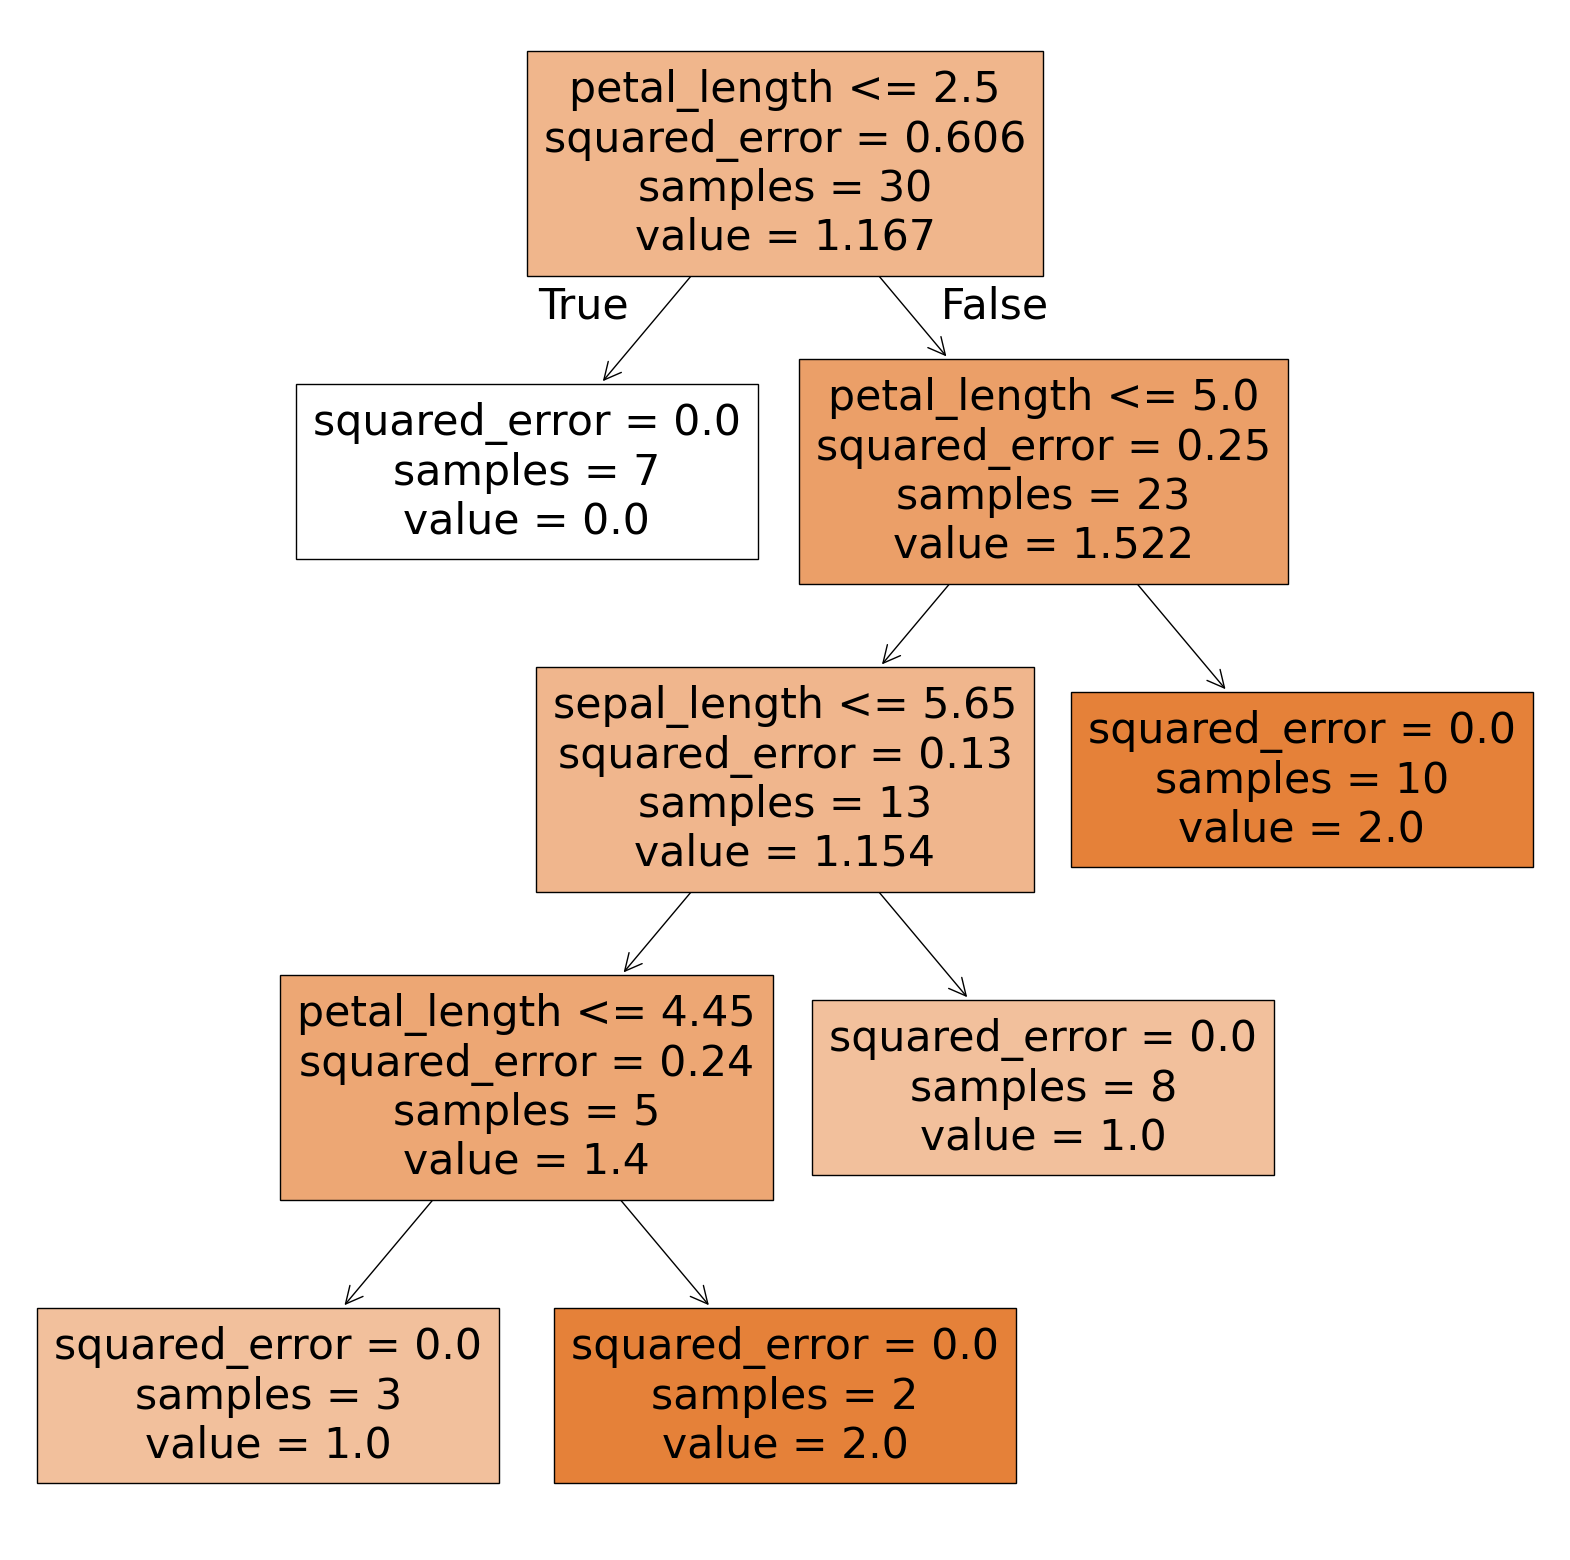

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=modelo_arbol,filled=True  , class_names=df["species"].unique(), feature_names=df.columns.tolist());
# pureza del nodo :v

In [15]:
y_entrenamiento
valo= {}
for num in y_prueba:
    if num  in valo:
        valo[num]+=1
    else:
        valo[num]= 0

valo

{np.int64(1): 38, np.int64(0): 42, np.int64(2): 37}

In [16]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

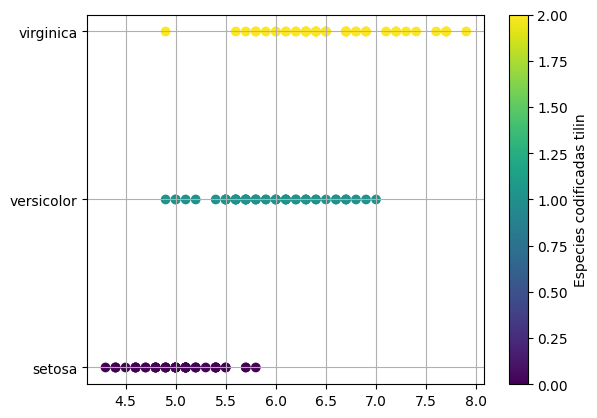

In [18]:
X =df.iloc[:,:-1]
tokenizador = LabelEncoder()
y = tokenizador.fit_transform(df["species"])

plt.grid()
scatter =plt.scatter(X["sepal_length"], y, label="longitud cepalo cm", c=y)
plt.yticks([0,1,2], ["setosa", "versicolor","virginica"])
cbar = plt.colorbar(scatter)
cbar.set_label("Especies codificadas tilin")

In [19]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 0, 'longitud')

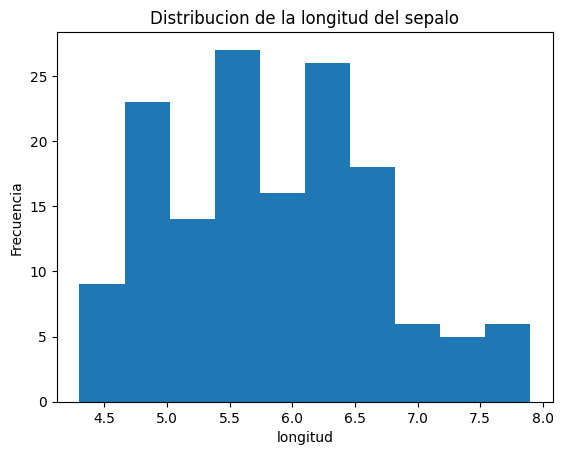

In [20]:
plt.title("Distribucion de la longitud del sepalo")
plt.hist(df["sepal_length"])
plt.ylabel("Frecuencia")
plt.xlabel("longitud")

# arboles aleatorios
regresion y clasifiacion


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_csv("tarjetas_credito.csv")
df

,Duracion,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Monto,Clase
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [25]:
# hallar relacion de todas las columnas son fraudolentas o no

In [27]:
# normalizaremos los datos para el algoritmo con mis max scaler

escala = MinMaxScaler(feature_range=(0,1))
normado = escala.fit_transform(df)
df =pd.DataFrame(normado, columns=df.columns)
df.head()

,Duracion,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Monto,Clase
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[: ,-1]


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
284802    0.0
284803    0.0
284804    0.0
284805    0.0
284806    0.0
Name: Clase, Length: 284807, dtype: float64

In [38]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, train_size=0.7, random_state=1)

In [49]:
aleatorio_bosque = RandomForestClassifier()

aleatorio_bosque.fit(X_entrenamiento, y_entrenamiento)

RandomForestClassifier()

In [40]:
aleatorio_bosque.score(X_prueba, y_prueba)

0.9995435553526912

In [43]:
nuevo_registro = pd.DataFrame({
    'Duracion': [0.000006], 'V1': [0.452345], 'V2': [0.564789], 'V3': [0.123456], 'V4': [0.654321],
    'V5': [0.987654], 'V6': [0.345678], 'V7': [0.234567], 'V8': [0.876543], 'V9': [0.456789],
    'V10': [0.567890], 'V11': [0.678901], 'V12': [0.789012], 'V13': [0.890123], 'V14': [0.901234],
    'V15': [0.012345], 'V16': [0.543210], 'V17': [0.432109], 'V18': [0.321098], 'V19': [0.210987],
    'V20': [0.109876], 'V21': [0.098765], 'V22': [0.887654], 'V23': [0.776543], 'V24': [0.665432],
    'V25': [0.554321],     'V26': [0.443210], 'V27': [0.332109], 'V28': [0.221098], 'Monto': [0.110987]
}, index=[0])

prediccion = aleatorio_bosque.predict(nuevo_registro)
prediccion

array([0.])

In [44]:
probabilidades_legitimidad = aleatorio_bosque.predict_proba(nuevo_registro) 
probabilidades_legitimidad

array([[0.55, 0.45]])

# como elegir el mejor algoritmo de machine learning

In [ ]:
# algoritmos

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
df = pd.read_csv("tarjetas_credito.csv")
escala = MinMaxScaler(feature_range=(0,1))
normado = escala.fit_transform(df)
df =pd.DataFrame(normado, columns=df.columns)
df.head()
X = df.iloc[:, :-1]
y = df.iloc[: ,-1]

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, train_size=0.7, random_state=1)

In [48]:
modelos = {
    "reg_log": LogisticRegression(),
    "tree": DecisionTreeClassifier(),
    "bosque": RandomForestClassifier()
}

for nombre, modelo in modelos.items():
    modelo.fit(X_entrenamiento, y_entrenamiento) 
    puntaje = modelo.score(X_prueba, y_prueba)
    print(F"Modelo {nombre}: {puntaje:.4f}")


Modelo reg_log: 0.9990
Modelo tree: 0.9992
Modelo bosque: 0.9995


# FINAL